In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [2]:
# Load data 
fpath =  "Data/ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df = df.set_index("PID")
# Define columns to use
columns_to_use = columns_to_use = ['SalePrice', 'Living Area Sqft', 'Lot Frontage', 'Bldg Type', 'Bedroom','Total Full Baths','MS Zoning','Street', 'Alley','Utilities']
df = df[columns_to_use]
df.head()

,SalePrice,Living Area Sqft,Lot Frontage,Bldg Type,Bedroom,Total Full Baths,MS Zoning,Street,Alley,Utilities
PID,,,,,,,,,,
907227090,119900.0,864.0,60.0,1Fam,3,1.0,RL,Pave,NaN,AllPub
527108010,320000.0,2462.0,134.0,1Fam,4,3.0,RL,Pave,NaN,AllPub
534275170,151500.0,958.0,NaN,1Fam,2,1.0,RL,Pave,NaN,AllPub
528104050,385000.0,2084.0,114.0,1Fam,2,3.0,RL,Pave,NaN,AllPub
533206070,193800.0,1565.0,32.0,TwnhsE,2,3.0,FV,Pave,Pave,AllPub


In [3]:
# Select columns to use
columns_to_use = ['SalePrice', 'Living Area Sqft', 'Lot Frontage', 'Bldg Type', 'Bedroom',
                      'Total Full Baths','MS Zoning','Street', 
                      'Alley','Utilities']
# Functionizing the load data from above for .py file
def load_data():
    fpath =  "Data/ames-housing-dojo-for-ml.csv"
    df = pd.read_csv(fpath)
    df = df.set_index("PID")
    df = df[columns_to_use]
    return df

In [4]:
# Verify the function works as expected
df = load_data()
df.head()

,SalePrice,Living Area Sqft,Lot Frontage,Bldg Type,Bedroom,Total Full Baths,MS Zoning,Street,Alley,Utilities
PID,,,,,,,,,,
907227090,119900.0,864.0,60.0,1Fam,3,1.0,RL,Pave,NaN,AllPub
527108010,320000.0,2462.0,134.0,1Fam,4,3.0,RL,Pave,NaN,AllPub
534275170,151500.0,958.0,NaN,1Fam,2,1.0,RL,Pave,NaN,AllPub
528104050,385000.0,2084.0,114.0,1Fam,2,3.0,RL,Pave,NaN,AllPub
533206070,193800.0,1565.0,32.0,TwnhsE,2,3.0,FV,Pave,Pave,AllPub


In [5]:
# Obtain summary statistics
df.describe().round(2)

,SalePrice,Living Area Sqft,Lot Frontage,Bedroom,Total Full Baths
count,2930.00,2930.00,2440.00,2930.00,2928.00
mean,180825.07,1499.69,69.22,2.85,2.00
std,79878.22,505.51,23.37,0.83,0.75
min,12789.00,334.00,21.00,0.00,0.00
25%,129500.00,1126.00,58.00,2.00,1.00
50%,160000.00,1442.00,68.00,3.00,2.00
75%,213500.00,1742.75,80.00,3.00,2.00
max,755000.00,5642.00,313.00,8.00,6.00


In [6]:
# In our notebook we can use df.info() to output our summary info into our console (direclty below the cell)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SalePrice         2930 non-null   float64
 1   Living Area Sqft  2930 non-null   float64
 2   Lot Frontage      2440 non-null   float64
 3   Bldg Type         2930 non-null   object 
 4   Bedroom           2930 non-null   int64  
 5   Total Full Baths  2928 non-null   float64
 6   MS Zoning         2930 non-null   object 
 7   Street            2930 non-null   object 
 8   Alley             198 non-null    object 
 9   Utilities         2930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 251.8+ KB


In [7]:
# Display .info()
# In order to display output on our app, we first need to capture it. 
# We can use an IO buffer to capture the output, then we will use the getvalue() argument to retrive it
from io import StringIO
# Create a string buffer to capture the content
buffer = StringIO()
# Write the info into the buffer
df.info(buf=buffer)
# Retrieve the content from the buffer
summary_info = buffer.getvalue()
# What the output looks like in the console
summary_info

"<class 'pandas.core.frame.DataFrame'>\nInt64Index: 2930 entries, 907227090 to 902201120\nData columns (total 10 columns):\n #   Column            Non-Null Count  Dtype  \n---  ------            --------------  -----  \n 0   SalePrice         2930 non-null   float64\n 1   Living Area Sqft  2930 non-null   float64\n 2   Lot Frontage      2440 non-null   float64\n 3   Bldg Type         2930 non-null   object \n 4   Bedroom           2930 non-null   int64  \n 5   Total Full Baths  2928 non-null   float64\n 6   MS Zoning         2930 non-null   object \n 7   Street            2930 non-null   object \n 8   Alley             198 non-null    object \n 9   Utilities         2930 non-null   object \ndtypes: float64(4), int64(1), object(5)\nmemory usage: 251.8+ KB\n"

In [8]:
# Displaying null values
nulls =df.isna().sum()
nulls

SalePrice              0
Living Area Sqft       0
Lot Frontage         490
Bldg Type              0
Bedroom                0
Total Full Baths       2
MS Zoning              0
Street                 0
Alley               2732
Utilities              0
dtype: int64

In [9]:
# Check data type
type(nulls)

pandas.core.series.Series

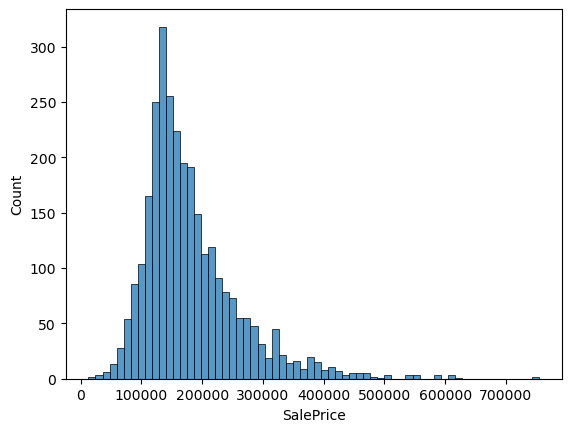

In [10]:
# Histogram
sns.histplot(data = df, x = 'SalePrice');

In [11]:
# Function for returning a histogram fig
def plot_hist(df, column):
    fig, ax = plt.subplots()
    sns.histplot(data = df, x = column)
    return fig

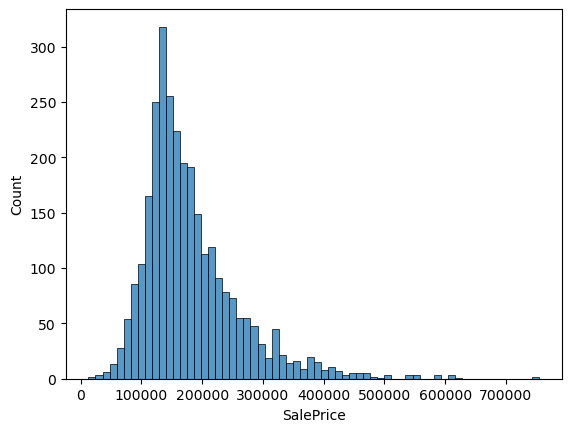

In [12]:
# Test the function
fig = plot_hist(df, 'SalePrice')

In [14]:
# Revisiting original custom function for exploring categorical values
# Original from LP week 4
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
 
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

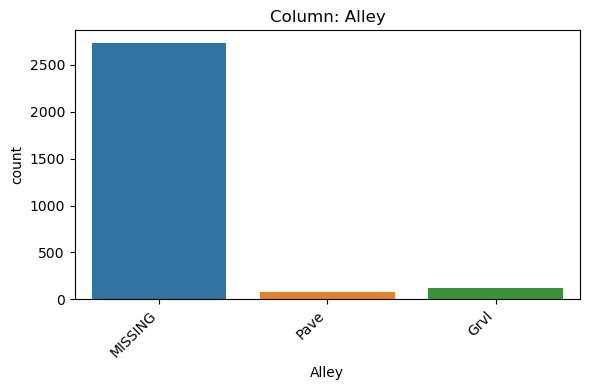

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [15]:
# Review function output
explore_categorical(df, 'Alley');

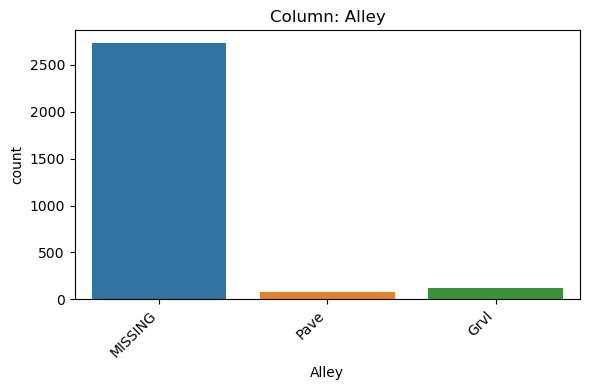

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [16]:
# Save the output of the function
fig, ax = explore_categorical(df, 'Alley')

In [18]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  return fig

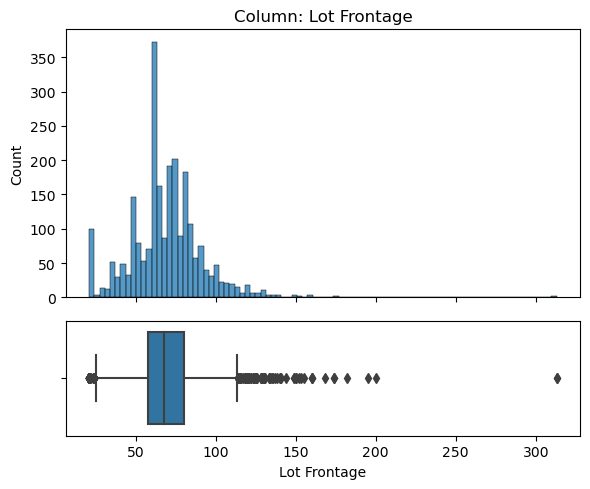

- NaN's Found: 490 (16.72%)


In [19]:
# Review output
fig = explore_numeric(df, 'Lot Frontage')

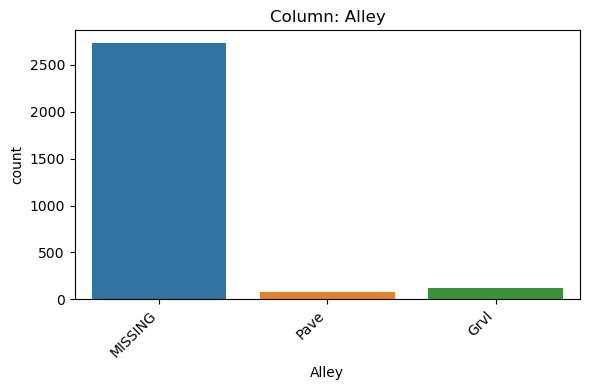

In [20]:
# Try a categorical column to test conditional statement
column = 'Alley'
if df[column].dtype == 'object':
    fig = explore_categorical(df, column)
else:
    fig = explore_numeric(df, column)

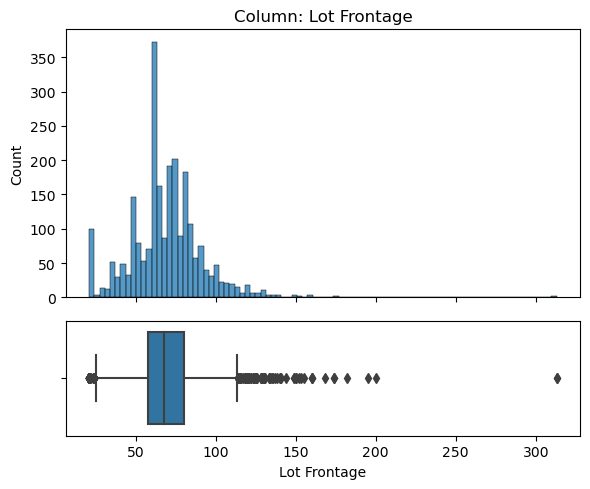

- NaN's Found: 490 (16.72%)


In [21]:
# Try a numeric column to test conditional statement
column = 'Lot Frontage'
if df[column].dtype == 'object':
    fig = explore_categorical(df, column)
else:
    fig = explore_numeric(df, column)

In [22]:
# Check list of columns
columns_to_use

['SalePrice',
 'Living Area Sqft',
 'Lot Frontage',
 'Bldg Type',
 'Bedroom',
 'Total Full Baths',
 'MS Zoning',
 'Street',
 'Alley',
 'Utilities']